In [142]:
import scipy as sp
import numpy as np
from sklearn import decomposition
from sklearn import cluster

In [178]:
%run load_dino sulcus-59.out

In [143]:
dinodata = np.loadtxt('sulcus-165.out')

In [14]:
#data is samples x 1 + 3 * timesteps matrix
#gap is a double
#returns indices (right now at least)
def poissonDiscSample(data, gap = 0.001):
    outvals = []
    indices = range(np.size(data,0))
    for i in indices:
        good = True
        for j in outvals:
            if getDist(data[i, :], data[j,:]) < gap:
                good = False
                break
        if good:
            outvals.append(i)
    return outvals

def getDist(a, b):
    c = a[1:4]
    d = b[1:4]
    return np.linalg.norm(c-d)
            

In [208]:
out = poissonDiscSample(dinodata, 0.001)
len(out)

KeyboardInterrupt: 

In [216]:
np.shape(dinodata)

(59231, 841)

In [228]:
a = dinodata[indices]
np.shape(a)
#a = dinodata

In [229]:
b = a[:,3]
c = b.reshape((-1,1))
np.shape(c)

(59231, 1)

In [241]:
n_layers = 1
sc = cluster.KMeans(n_clusters=n_layers)
labels = sc.fit_predict(c)

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [240]:
vals = []
for i in range(n_layers):
    vals.append((i, a[labels==i,3][0]))
sorted(vals, key=lambda x : x[1])

[(0, -0.043834699999999997)]

<IPython.core.display.Javascript object>


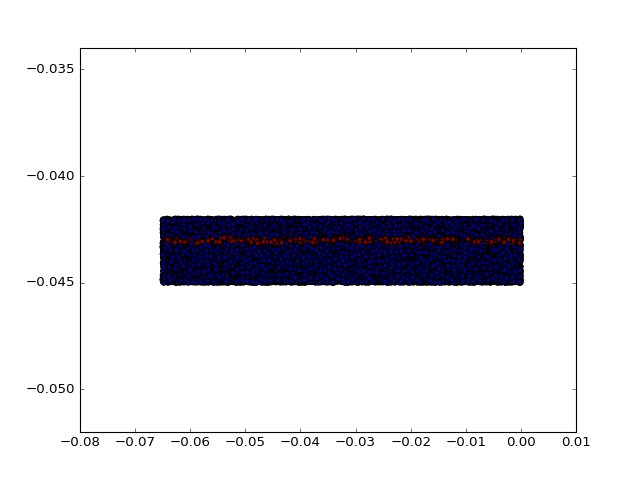

In [187]:
fig = plt.figure()
plt.scatter(a[:,1], a[:,3], c=(labels == 5))

<IPython.core.display.Javascript object>


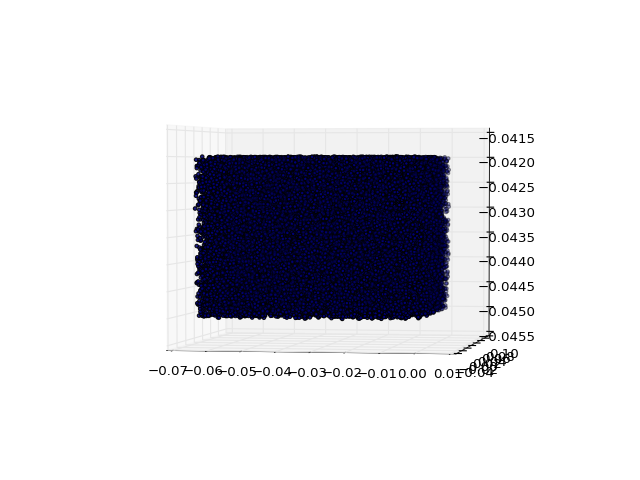

In [242]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[:,1], a[:,2], a[:,3], s=10, c=(labels))

In [243]:
dlist = []
outstr = []
for i in range(n_layers):
    d = a[labels == i,1:3];
    delaunay = sp.spatial.Delaunay(d)
    dlist.append(delaunay)
    s = dlist[i].simplices
    outints = a[labels == i,0][s]
    outstr.append('\n'.join([' '.join([str(int(v)) for v in arr]) for arr in outints]))
out = '\n'.join(outstr)


<IPython.core.display.Javascript object>


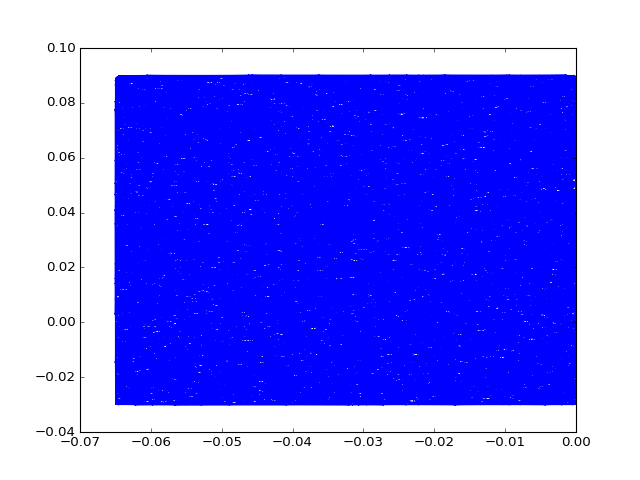

In [245]:
f = plt.figure()
t = 0
plt.triplot(a[labels==t, 1], a[labels==t, 2], dlist[t].simplices.copy())

In [237]:
len(outstr[0])

236660

In [246]:
out = '\n'.join([outstr[i] for i in [0]])

In [247]:
f = open('sulcus-59-weird-test', 'w')
f.write(out)
f.close()